# Behavioural cloning for steering a car autonomously using Deeplearning

The goal of this tutorial is to write a convolutional neural network and train it end-to-end using camera inputs and select steering parameters to obtainreli a reliable driving model, which would propel the vehicle autonomoulsy on an unforeseen track in a driving simulator.

The driving simulator has been provided by Udacity for training and testing one's driving model an can be downloaded from [here](https://github.com/udacity/self-driving-car-sim).

The task of behavioural cloning constitutes 3 camera inputs as - **Center, Left, right, a steering angle** and forms a case for Supervised regression problem, which essentially calls for mapping camera inputs to a steering angle during test. Therefore a CNN could be trained over camera images as input and steering angles as target labels to convieniently predict steering angles for unforeseen views at test time.

Although the CNN written here largely utilizes dense topology from densenets, kernels of form (Nx1) & (1xN) some insights for choosing filter sizes, modelling sequnces have been partly drawn from [this](https://devblogs.nvidia.com/deep-learning-self-driving-cars/) Nvidia's model. Which would be later improvised for efficient training and quick inferences using winograd minimal filtering algorithms, the performance of which is cited significantly better than conventional convolution, as a result of reduced multiplication operations.

### Foreword:
The following script is instructive in nature, aimed to impart clarity in employing end-to-end deep learning specific to this behaviour cloning problem. The learnings from which could be employed widely to similar image-recognition piplelines.

The script can be run solely in google colab or jupyter (with sufficient compute).
Although the code written in the following script is largely self-sufficient for training & validating over input datasets, beforehand it does calls for **bridging one's google drive to bring ease to the process of importing large datasets**(constituting driving_log.csv & IMG folder) to the colab environment.

### The complete scope of this project constitutes a walkover from driving simulator, dependencies, datasets, dense models, training to tertiary scripts.
### The pipeline for cloning driving behaviour problem consists of several steps and hence describes the layout of this project, elaborated pointwise as follows:
* **1. Configuring driving simulator :** udacity has provided a unity based driving simulator which could be used to train and test one's ML driving models. it has two modes- **a) Driving mode:** where player can choose one of two tracks to drive her car manually, while it needs setting a directory for recording input image frames and a steering input from user to a single CSV file. **b) Autonomous mode:** where a trained deep learning model can interact with simulator enviornment through a tertiary script which feeds an input stream of images to model, predicting steering angles which drives car in real-time.
*  **2. Data collection:** This involves setting up a training data directory on local machine and manually driving the vehicle on drive simulator. Driving for about 35-40 minutes records a good 12k instances worth of data, which constitutes 12k sets of camera views/images(1 set=3 images) and a CSV file storing 12k records constituting image paths to above images and 4 driving parameters essentially in order- steering angle, throttle, deacceleration, speed.

* **3. Data upload**: It constitutes zipping & uploading the collected dataset to google drive, for it to be conveniently imported later to work environment- google colab, when local machine is incapable of computing on large dataset.

* **4. Installing dependencies:** Installing and importing dependencies such as- **PyDrive, Keras, Numpy, Pandas, Scikitlearn, os, Matplotlib, cv2.**

* **5. Importing datasets-Bridging G-drive:**

* **6. Data Extraction**

* **7. Data Cleaning**

* **8. Defining Data processing functions**

* **9. Defining the CNN model**

* **10. Model training & evaluation**

* **11. Model testing**



 ## 4. **Installing dependencies:**
 *  Installing and importing dependencies such as:
 
 • **PyDrive**
 • **Keras**
 • **Numpy**
 • **Pandas**
 • **Scikitlearn**
 • **os**
 • **Matplotlib**
 • **cv2** •

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import keras
import cv2
from keras.models import Model
from keras.layers import Input,Activation, Lambda
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, BatchNormalization, AveragePooling2D, Concatenate
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [2]:
!pip install PyDrive

    100% |████████████████████████████████| 993kB 7.9MB/s 
  Running setup.py bdist_wheel for PyDrive ... - \ done
  Stored in directory: /content/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


## 5. Importing datasets-Bridging G-drive:
* Uploading large image datasets on google drive and later importing to colab is more convenient and time saving than directly uploading to colab environment conventinally.

* PyDrive facilitate importing dataset from google drive.
* It creates pydrive client and seeks authorization to access drive which holds zipped dataset.
running following code prompts to open a link alike in browser:
![auth](https://drive.google.com/open?id=1sgavLpS3HSdrbfDbAVQiYBngUjHAzi1W)
Therafter it directs to authorization link as:
![authDrive](https://drive.google.com/open?id=1b9OzoPVsV2rAzJyUnQLDeFWcUrZXOfLx)


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

♦  **Adding zipped dataset files from google drive to colab notebook**

> The following code creates google drive instances corresponding to driveFile IDs of two different zipped files.



> • Here two separate zip files are imported as- data.zip & data1.zip, as both datasets were collected differently, hence contain two CSV files pointing to different sets of images












In [4]:
drive_instance = drive.CreateFile({'id': '1SOv93zFqya3PGGuvUn0xHTUlH9MU74Bt'})#DRIVE_FILE_ID for file drive.zip in google drive
print(drive_instance['title'])
drive_instance.GetContentFile('data1.zip') # Save Drive file as a local file with new name data.zip

drive_instance = drive.CreateFile({'id': '1IkoUPkViNpxdNMQ-3caJwqWCRI2jvNuu'})#DRIVE_FILE_ID for file drive2.zip in google drive
print(drive_instance['title'])#native name of file in google drive
drive_instance.GetContentFile('data2.zip')# Save Drive file as a local file with new name data1.zip

drive.zip
drive2.zip


**♦ Unzipping datasets and moving all images to one common image folder**


> •Run the following code to unzip.

> •move all image files from **'/content/drive2/IMG'** to **'/content/drive/IMG'**, for both CSVs(**'/content/drive2/IMG/driving_log.csv'** and **'/content/drive/IMG/driving_log.csv'**) to be pointing to one common IMG folder(**'/content/drive2/IMG'**) to locate all images, after **concatenating** two CSVs. 








In [0]:
#the output of these two lines is cleared as the list of unzipped objects was huge.
!unzip data1.zip 
!unzip data2.zip

In [13]:
#count of images in both directory before moving
a = os.listdir('/content/drive/IMG') #to counts number of files in a drive/IMG directory

b = os.listdir('/content/drive2/IMG') #to counts number of files in a drive/IMG directory
print('initial count of images in both drive/IMG and drive2/IMG before:',len(a),len(b))

initial count of images in both drive/IMG and drive2/IMG before: 43782 16444


In [14]:
!mv /content/drive2/IMG/*.jpg /content/drive/IMG/

a = os.listdir('/content/drive/IMG') #to counts number of files in a drive/IMG directory
b = os.listdir('/content/drive2/IMG') #to counts number of files in a drive/IMG directory
print('count of images in both directory after moving drive2/IMG files to drive/IMG:',len(a), len(b))

#!cp /content/drive_recovery/drive2/IMG/*.jpg /content/drive/IMG/
#!rm -r /content/drive2/IMG/*.jpg#removing all files copied to drive/IMG

count of images in both directory after moving drive2/IMG files to drive/IMG: 60225 1


## 6. Data Extraction
* The image paths and steering parameters are stored wihout headers in raw CSV file obtained from manual driving session in drive simulator.
* Importing CSVs into pandas dataframe under columns named - **center, left, right, angle, throttle, brake, speed.**
* total number of records in two datasets = 14594 +  5473
* Number of parameters per record= 7
* Relevent parameters= 3(camera views) + 1(steering angle) 

**• Dataset 1(Main dataset)**
 
>  **shaped (14594, 7)**



In [16]:
path ='/content/drive' #path stroing Main CSV and image files


dataset = pd.read_csv(os.path.join(path, "driving_log.csv"), names= 'center,left,right,angle,throttle,brake,speed'.split(','))
print('dataset shape: ',dataset.shape)#dataset size prior to addition
dataset.head(3)

dataset shape:  (14594, 7)


,center,left,right,angle,throttle,brake,speed
0,C:\drive\IMG\center_2018_06_09_22_48_01_636.jpg,C:\drive\IMG\left_2018_06_09_22_48_01_636.jpg,C:\drive\IMG\right_2018_06_09_22_48_01_636.jpg,0.0,0.0,0.0,0.000079
1,C:\drive\IMG\center_2018_06_09_22_48_01_948.jpg,C:\drive\IMG\left_2018_06_09_22_48_01_948.jpg,C:\drive\IMG\right_2018_06_09_22_48_01_948.jpg,0.0,0.0,0.0,0.000078
2,C:\drive\IMG\center_2018_06_09_22_48_02_275.jpg,C:\drive\IMG\left_2018_06_09_22_48_02_275.jpg,C:\drive\IMG\right_2018_06_09_22_48_02_275.jpg,0.0,0.0,0.0,0.000079


**• Dataset 2 (additional dataset)**
 
>  **shaped (5473, 7)**



In [17]:
#concatenating img_path CSV('/content/drive_recovery/drive2/driving_log.csv) pointing to additional image files added to drive/IMG folder with above dataset.
path2= "/content/drive2/driving_log.csv" #path to second CSV

dset_2 = pd.read_csv(path2)#this CSV is already sorted under required columns
dset_2.drop(columns= [dset_2.columns[0]], inplace= True)#dropping first redundant column
print('dataset shape: ',dset_2.shape)
dset_2.head(3)

dataset shape:  (5473, 7)


,center,left,right,angle,throttle,brake,speed
0,C:\drive\IMG\center_2018_06_28_14_36_32_102.jpg,C:\drive\IMG\left_2018_06_28_14_36_32_102.jpg,C:\drive\IMG\right_2018_06_28_14_36_32_102.jpg,0.0,0.0,0.0,0.000165
1,C:\drive\IMG\center_2018_06_28_14_36_32_822.jpg,C:\drive\IMG\left_2018_06_28_14_36_32_822.jpg,C:\drive\IMG\right_2018_06_28_14_36_32_822.jpg,0.0,0.0,0.0,0.000165
2,C:\drive\IMG\center_2018_06_28_14_36_33_082.jpg,C:\drive\IMG\left_2018_06_28_14_36_33_082.jpg,C:\drive\IMG\right_2018_06_28_14_36_33_082.jpg,0.0,0.0,0.0,0.000164


## 7. Data Cleaning
* Curating data to foster **easeful manipulation** during testing and visualization of single or multiple reocords; And also to **test functionalities of different subprograms, functions** affecting dataset images.
* Curating data to cater model training, as there exist two disparate datasets, that too with file path formats incosistent with colab's file path convention.

♦ **Concatenating two dataframes**


>  • Appending numpy arrays(obtained two dataframes) 

>  • Converting numpy array to single dataframe under same 7 columns.

>  • dataframe shaped** (20067, 7)**



In [18]:
dataset= np.append(dataset.values, dset_2.values, axis= 0)#appending dataset and dset_2 as numpy arrays
print(type(dataset), dataset.shape)

<class 'numpy.ndarray'> (20067, 7)


In [19]:
dataset = pd.DataFrame(dataset, columns= 'center,left,right,angle,throttle,brake,speed'.split(','))
print('dataset shape: ', dataset.shape)
dataset.head(3)#new improvised dataset

dataset shape:  (20067, 7)


,center,left,right,angle,throttle,brake,speed
0,C:\drive\IMG\center_2018_06_09_22_48_01_636.jpg,C:\drive\IMG\left_2018_06_09_22_48_01_636.jpg,C:\drive\IMG\right_2018_06_09_22_48_01_636.jpg,0,0,0,7.8748e-05
1,C:\drive\IMG\center_2018_06_09_22_48_01_948.jpg,C:\drive\IMG\left_2018_06_09_22_48_01_948.jpg,C:\drive\IMG\right_2018_06_09_22_48_01_948.jpg,0,0,0,7.77743e-05
2,C:\drive\IMG\center_2018_06_09_22_48_02_275.jpg,C:\drive\IMG\left_2018_06_09_22_48_02_275.jpg,C:\drive\IMG\right_2018_06_09_22_48_02_275.jpg,0,0,0,7.86226e-05


**♦ Modifying existing file paths in training dataset to *Colab compatible* file paths**
* Existing file path is of form **"\drive\IMG\image.jpg"**, whereas colab convention for file path is of form **"/drive/IMG/image.jpg"**
* modifying existing paths pointing folder in local machine **(C:\drive\IMG\image)** to paths pointing image folder in colab **(content\drive\IMG\image.jpg)**.

**• Run the following code for altering image paths only for colab assistance, otherwise it works fine on local machine.**

In [20]:
df_views= list(dataset.columns[:3])#gauges the list of 3 views- center, left, right

for view in df_views:#chops off C:\ from image paths of each column
    dataset[view]= dataset[view].apply(lambda x: (x.strip()[3:]).replace("\\","/"))#replacing \ with / for each path to be readable on colab notebook
    
    #Alternately above string modification could be done as two ooeprations
    #dataset[view]= dataset[view].apply(lambda x: x.strip()[3:])
    #dataset[view]= dataset[view].apply(lambda x: x.replace("\\","/"))

balanced_df= dataset# equating balanced & original dataset to avoid balancing operation which would trim training datset to just 5000
print('balanced dataset shape: ', balanced_df.shape)
balanced_df.head(3)

balanced dataset shape:  (20067, 7)


,center,left,right,angle,throttle,brake,speed
0,drive/IMG/center_2018_06_09_22_48_01_636.jpg,drive/IMG/left_2018_06_09_22_48_01_636.jpg,drive/IMG/right_2018_06_09_22_48_01_636.jpg,0,0,0,7.8748e-05
1,drive/IMG/center_2018_06_09_22_48_01_948.jpg,drive/IMG/left_2018_06_09_22_48_01_948.jpg,drive/IMG/right_2018_06_09_22_48_01_948.jpg,0,0,0,7.77743e-05
2,drive/IMG/center_2018_06_09_22_48_02_275.jpg,drive/IMG/left_2018_06_09_22_48_02_275.jpg,drive/IMG/right_2018_06_09_22_48_02_275.jpg,0,0,0,7.86226e-05


----------------------------------------------------------

**♦ Note: The following code greatly reduces the dataset size, as most records are mapped to steering angles valued 0. Hence one shouldn't resort to this code & Ignore running following cell, if the dataset size is meagerly small (which it is, in this case).**

***• (It trims above dataset of 20k records to 4k records, which is quite insufficient for model training, hence ignored balancing).***

♦ Balancing dataset across disparate sterring angle values.
* The following code outputs a new dataframe by discarding most records with steering angle values nearing 0.
* It curates a dataframe with data instances across consitently spread non-zero steering angles, which otherwise board long intervals of records with zero steering angles.
* It reduces dataset size to huge extent.

In [0]:
balanced_df = pd.DataFrame() 	# Balanced dataset
bins = 1500 				# N of bins
bin_n = 200 				# N of examples to include in each bin (at most)

start = 0
intervals=  list(np.linspace(0, 1, num=bins))#outputs a list of 100 values falling between 0 and 1. 
#intervals.pop(0)

for end in intervals: 
    df_range = dataset[(np.absolute(dataset.angle) >= start) & (np.absolute(dataset.angle) < end)]# there is a possiblity that between two interval values start
    #and end, there could be 0 number of records/instances with steering value satistfying >=start & <end 
    range_n = min(bin_n, df_range.shape[0])
    if range_n>0:#this concatenates df_range with balanced only if multiple instances are found with (>=start & <end )satisfying values of steering, i.e., df_range.shape =/0
        balanced_df = pd.concat([balanced_df, df_range.sample(range_n)])
    start = end

#balanced_df.to_csv(os.path.join(path, "balanced_driving_log.csv"), index=False)# writing the new sequence of drive log to a CSV

In [0]:
print(balanced_df.shape)#after balancing 20k records to ~5k


(4498, 7)


----------------------------------

**♦ Splitting the training dataset in train and validation sets.**
* Slicing camera views from columns- **'center', 'left', 'right'** to a single input array X.
* Slicing steering angles  from column **'angle'** to a single target array y.
* Splitting the input array X and target array y in train validation split proportion of 0.1
* train x shaped (18060,3 ), train y shaped (18060,1 ) 
* val x shaped (2007,3 ), val y shaped (2007,1 )

In [23]:
X= balanced_df[['center','left','right']].values #slicing camera views and angles to store numpy arrays from dataframes
y =balanced_df[['angle']].values

train_x, val_x, train_y, val_y = train_test_split(X, y, test_size = 0.1)
print(type(train_x),'\n',train_x.shape, train_y.shape, 'val data: \n', val_x.shape, val_y.shape)

<class 'numpy.ndarray'> 
 (18060, 3) (18060, 1) val data: 
 (2007, 3) (2007, 1)


## 8. Defining Data processing functions
* The dataset arrays - (train x, train y), (val x, valy) above cannot be directed to defined model for training or validation right away, all at once and moreover without basic pre-processing.
* Model training and validation operation requires a batch generator function to limit the throughput sent over to model at a time.

• The following pipleine block consist of two requiste data processing functions- **"preprocess"** and **"batch_gen" **needed to truncate and alter the input images directed to model.


**♦ Image preprocessing function**

• The following function serves for both training and validation operation, corresponding to **augment flag**.
* For training operation it processes the image by randomly applying operations such as:


> **• flipping & Translating image & steering values • adding irreglar shadows to images• **

* For validation, it processes the image by trimming some top and bottom pixels of the image and strapping it to image size of (66,200,3) required by defined model.

* The process such as- **trimming off the redundant top & bottom** of image, **strapping it to the image size of (66,200,3) as required by defined model** and **masking YUV encoding** to the final image **is common to both train and validation operation**.

• The following function takes arguments as- **image array, steering angles, augment flag(False by default)** and ouputs a processed image strapped to recommended dimension and a steering angle for both train & validation operations.

In [0]:
def preprocess(image, angles, augment= False, data_addition= False):# translate= False):
    
    if data_addition:
      img = cv2.flip(image, 1)
      angles = -angles
      return img, angles      
    
    if augment:#flips every image that comes for training
        img = cv2.flip(image, 1)
        angles = -angles
        
        trans_x = 100 * (np.random.rand() - 0.5)
        trans_y = 10 * (np.random.rand() - 0.5)
        angles+= trans_x * 0.003
        trans_m = np.float32([[1, 0, trans_x], [0, 1, trans_y]])
        h, w = img.shape[:2]
        img = cv2.warpAffine(img, trans_m, (w, h))
        
        
        if np.random.randint(0,6)<=3:#if true, outputs either randomly shadowed flipped images or unflipped training pictures, ignored if false.
            if np.random.randint(0,2)<1:#if true, outputs shadows added to above flipped images
              h, w = img.shape[0], img.shape[1]
              [x1, x2] = np.random.choice(w, 2, replace=False)
              k = h / (x2 - x1)
              b = - k * x1
              for i in range(h):
                c = int((i - b) / k)
                img[i, :c, :] = (img[i, :c, :] * (0.5)).astype(np.int32)
            else:#else, outputs shadows added to original incoming training images and same angles
              img, angles= cv2.flip(img, 1), -angles
              h, w = image.shape[0], image.shape[1]
              [x1, x2] = np.random.choice(w, 2, replace=False)
              k = h / (x2 - x1)
              b = - k * x1
              for i in range(h):
                c = int((i - b) / k)
                img[i, :c, :] = (img[i, :c, :] * (0.5)).astype(np.int32)
        return img, angles
    
    img= image[60:-25]#trimming top and bottom a little
    img= cv2.resize(img, (200, 66), cv2.INTER_AREA)# resizing trimmed img to (200,66)
    return cv2.cvtColor(img, cv2.COLOR_RGB2YUV), angles

-------------

** Note: Ignore running the following cell.**

**♦ The following code is written to transform the dataset array of image paths to dataset array of corresponding images(numerical arrays).**

• It is defined for two probable purposes:
1. To avoid passing an array of image paths to batch_gen function during training/validation, instead passing an array of images(numerical arrays) itself.**
2. To expand the training dataset size beforehand by appending large number of augmented images(yielded from preprocessing function exclusively) to existing dataset prior to training, as augmentation during training through batch_gen function just processes the limited images in real-time, i.e., doesnt append & expand dataset size. hence largely falls out of training performace due to small input dataset.

***• (Running the following code successfully outputs the numerical array of images corresponding to array of image paths, Nonetheless having large compte & memory overhead in the process.
But the following method is spiking errors in concatenating the dataset array of images and augmented images output from preprocess function, due to mismatching shapes of two arrays. which is yet to be corrected. ***




In [0]:
##this function returns the matrix representation of all images 
def data_array(path_dataframe):#path_dataframe= dataset
    df_views= list(path_dataframe.columns[:3])#gauges the list of 3 views- center, left, right
    #print(df_views)
    df = path_dataframe.copy()
    for view in df_views:#chops off C:\ from image paths of each column
        df[view]= path_dataframe[view].apply(lambda x: mpimg.imread(x.strip()))#here x is image_path for each image
    array = df[df_views].values# this array would be of shape (total numb of images, number of views(3))
    return array

# this is to exclusively augment random images & add to existing dataset during training time
def augmented_out(in_array,in_angle, num_augmented):
    aug_idx= np.random.randint(0, in_array.shape[0], size =num_augmented)#returns an array of num_augmented random indexes between 0 & total images
    x_aug = np.empty((num_augmented,3)+ in_array[0][0].shape)#, dtype= np.uint8)#array to store augmented images, is of same shape as 
    y_aug = np.empty((num_augmented,1))
    
    for i,j in enumerate(aug_idx):#zip(range(len(aug_idx), aug_idx):#i iterates index, j over random value
      for k in range(x_aug.shape[1]):
        x_aug[i][k], y_aug[i] = preprocess(in_array[j][k],in_angle[j],data_addition= True)
    
    x_new= np.append(in_array, x_aug, axis=0)
    y_new= np.append(in_angle, y_aug, axis=0)
    return x_new, y_new

**• To save the array dataset csv generated from image_paths csv**

In [0]:
#dataset.shape
d1= data_array(dataset)# d1 is analogous to X, d1 contains numpy arrays of all 3 views of 20k images
print(d1.shape, type(d1))

d2= pd.DataFrame(d1,columns='center,left,right'.split(','))#writing numerical arrays data to dataframe
d2.to_csv('data_array.csv')

from google.colab import files
files.download('data_array.csv')

(20067, 3) <class 'numpy.ndarray'>


[1.]


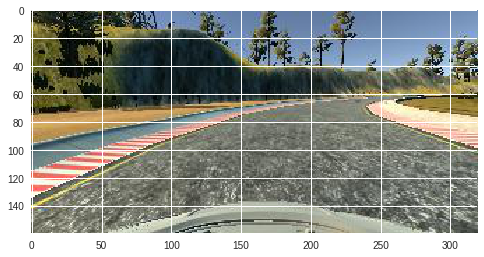

In [0]:
#one sample from exclusively augmented dataset
print(y_aug[2])
plt.imshow(x_aug[1][0])

[-0.0]


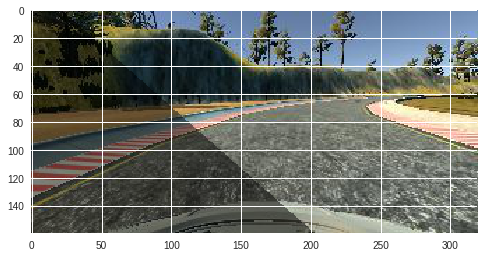

In [0]:
im1, ang1= preprocess(d1[0][0], y[0], True)# preprocessed image
print(ang1)
plt.imshow(im1)

--------------

**♦ Batchgenerator function for training**

* The following function **outputs a batch of processed images** for training and validation operations.
* For training operation, it randomly choses one of the 3 images alongside corresponding angle from input array and performs random augumentation on both through pre processing function.
* The Function also **adds a little corrective value to existing steering angle** corresponding to one of the 3 images- **for left image** to be chosen it **adds 0.22** to steering value similarly **for right image** view to be chosen it **adds -0.22** to the existing angle.
* For validation operation, it choses the centeral image from input array and perfroms basic processing such as-  **stripping top & bottom** of the images, **resizing to size desired** by model & **applying YUV encoding**.
* The function straps the output images to **(66,200,3)** as required by defined model, stores them to **"x_array"** and their corresponding steering values to "**y_array**" for one particular batch.

In [0]:
def batch_gen(img_path, angles, batch_size, train=False):
    '''input args:
    imgs: array of image paths, shaped (117,3)
    angs: array of steering angles, shaped(117,1)
    batch_size: batch size in which to process image_paths to array arrays
    train: flag by default False for testing, set True for training
    
    output:
    
    x_array: array of preprocessed images, shaped (Batch_size, 66,200)
    y_array:array of steering angles, shaped (Batch_size)
    '''
    
    img_width, img_height, channels= 66,200,3 
    
    x_array = np.empty((batch_size, img_width, img_height,channels), dtype= np.uint8)
    y_array = np.empty(batch_size)
    cameras= ['center', 'left','right']
    
    st_alter = [0., 0.22, -0.22 ]
    
    while True:
        i=0
        for idx in np.random.permutation(img_path.shape[0]):#iterates over jumbled indices order from total train/test dataset
        
        #filestr= ' '.join(map(str, train_x[i]))
        #filelist= list(filestr.split('  '))
        ##x_pil_instances= [load_img(fname, target_size=(img_width,img_height,channels)) for fname in d] #holds PIL images called from filelist paths
        #x_array[i] =np.array([np.array(load_img(fname, target_size=(img_width,img_height,channels))) for fname in filelist]) 
            st_angle= angles[idx]
            
            if train and np.random.rand()<=0.5:#randomly triggers with both flags true to randomly chose a camera view(center, left, right)
                
                camera_numb = np.random.randint(len(cameras))#randomly select the camera_view
                image = mpimg.imread(img_path[idx, camera_numb].strip())#loads one of the camera view image as numerical_arrays
                
                st_angle += st_alter[camera_numb]#adding slight deviation to steering angle
                
                image, st_angle = preprocess(image, st_angle, augment=True)#returns image and angle for flipped image(only Train=True)
                #image = random_shadow(image)

            else:#images which are dodged off above condition even at training=True are used as they are(no flipping, shadows)
                image = mpimg.imread(img_path[idx, 0].strip())#camera_view defaulted to 'center' strictly for test time
            
            
            x_array[i], y_array[i] = preprocess(image,st_angle)# returns a trimmed,resized image_array & angles, without flipping
            
            #center, left, right = imgs[idx]
            #x_array[i] = np.array(load_img(center, target_size=(img_width,img_height,channels)))            
            i+=1
            if i==batch_size:
                break
        yield x_array, y_array
    

## 9. Defining the CNN model

The insights for modelling has been partly drawn from [this](https://devblogs.nvidia.com/deep-learning-self-driving-cars/) Nvidia's model and.

* Prior to model definition, few suboridinate functions such as **covolutionfunc, denseblock** are defined.

♦ Overall defined model is as follows:

* ** Input layer; shape : 66x200x3**
* ** Convolution 5x1; filters: 24; activation:'relu'**
* ** Convolution 1x5; filters: 24; activation:'relu'**
* ** Convolution 5x1; filters: 36; activation:'relu'**
* ** Convolution 1x5; filters: 36; activation:'relu'**
* ** Dense block depth: depth: 4**



> **[ [Batchnorm]**

> **[Convolution 3x1; filters: 12; activation:'relu'] **

> **[Convolution 1x3; filters: 12; activation:'relu'] **

> **[Batchnorm] **

> **[Convolution 3x1; filters: 12; activation:'relu'] **

> **[Convolution 1x3; filters: 12; activation:'relu'] ]x 4**
 
 * ** Transition block:**

> **[ [Batchnorm]**
 
>  **[Convolution 3x1; filters: 12; activation:'relu'] **
 
>  **[Convolution 1x3; filters: 12; activation:'relu'] **
 
> ** [Pooling] ]**

 * ** Dense block depth: depth: 4**

> **[ [Batchnorm] **

> **[Convolution 3x1; filters: 12; activation:'relu'] **

> **[Convolution 1x3; filters: 12; activation:'relu'] **

> **[Batchnorm] **

> **[Convolution 3x1; filters: 12; activation:'relu'] **

> **[Convolution 1x3; filters: 12; activation:'relu'] ]x4**
 
 * ** Batchnorm**
 * ** Pooling**
 * ** Dense; neurons 100; activation: 'relu'**
 * ** Dropout**
 * ** Dense; neurons 50; activation: 'relu'**
 * ** Dense; neurons 10; activation: 'relu'**
 * ** Dense; neurons 1; (output)**

♦ **convoltionfunc**
* The following function serves two purposes corresponding to **as transition** flag.
* The function is largely employed for defining sequence of **batchnorm-relu-conv** layers in repeatation depending on depth of network, inside denseblock of the network.
* The function takes arguments as- ** input arrays, number of filters, dropout, as transition flag(False by default)** and outputs an array of same shape as that of input


> •For **False** as_Transition flag, It facilitates in defining dense layers concatenating at each interval, constuting denseblock of the overall Conolutional network, it adds several layers to network as: **batchnorm-relu-1x3 conv2d- 3x1 conv2d-batchnorm-relu-3x1conv2d-1x3 conv2d** periodically for defined depth in denseblock.

> •For **True** as_Transition flag, It performs as a **transition layer function** which is intended to pool down the spatial extent of input. It adds the layer in sequence as **batchnorm-relu-1x3 conv2d- 3x1 conv2d-average pool2d** to the network.





In [0]:
def convolutionfunc(in_array, num_filters, dropout=None, as_transition= False):
    comp= 0.5 #compression rate 
    x= BatchNormalization()(in_array)
    x= Activation('relu')(x)
    #if as_transition:#triggers (1,1) convolution & pooling when Convfunc used for transition layer
    
    x= Conv2D(int(comp*num_filters),(1,3),activation= 'relu', use_bias=False, padding='same')(x)# activation= 'relu',kernel_initializer='glorot_uniform',
    x= Conv2D(int(comp*num_filters),(3,1), use_bias=False, padding='same')(x) #  kernel_initializer='glorot_uniform',
    
    if as_transition:#triggers (1,1) convolution & pooling when Convfunc used for transition layer
        if dropout:
            x= Dropout(dropout/2)(x)
        x= AveragePooling2D(pool_size=(2,2))(x)
        return x
    
    #triggers (3,1)(1,3) convolution when convfunc is used for denseblock layer
    x= BatchNormalization()(x)
    x= Activation('relu')(x)
    x= Conv2D(int(comp*num_filters), (3,1), activation= 'relu', use_bias= False, padding='same')(x)# activation='relu', kernel_initializer='glorot_uniform'
    x= Conv2D(int(comp*num_filters), (1,3), use_bias= False, padding='same')(x)# kernel_initializer='glorot_uniform'
    if dropout:
        x= Dropout(dropout/2)(x)    
    return x

♦ **denseblock**
* The following function adds a block of convolution layers densely connected to each other layer, thus sharing features to far off layers, facilitating feature reuse and improved gradients flow during backpropagation.
* The function takes arguments such as- **input array, layers depth, number of filters, dropout**

In [0]:
def denseblock(in_array, depth, num_filters, dropout):
    block_array = in_array
    
    for i in range(depth):
        x= convolutionfunc(block_array,num_filters, dropout)
        
        block_array = Concatenate(axis=-1)([block_array, x])
    #block_array = AveragePooling2D(pool_size= (2,2))(block_array)    
    
    #slight changes to denseblock by pooling the output before returning, to avoid burgeoning number of parameters by the time it reaches dense layers.  
    return block_array

**♦ build_model**

* The following function consolidates above functions to define a complete convolutional network.

* The function takes arguments such as- **input dimension, layer depth, number of filters, dropot**
* It outputs a complete cnn model

In [0]:
def build_model(input_dim, depth, num_filters, dropout):
    '''
    input args-
    input dim: input_dimension, shape of image, ex- (66,200,3)
    depth: integer, depth of each dense block(num.of times denseblock loop to run), ex- 4
    num_filters: integer, filter count for each convolution, ex- 16.
    dropout: dropout rate during training, ex- 0.5
    
    output-
    model: dense_architecture model
    
    '''
    model_input = Input(shape= input_dim)#input_size (66,200,3)
    #model_input = Lambda(lambda x: x/127.5-1.0, input_shape= input_dim)
    
    x= Conv2D(24, (5,1),use_bias= False, activation= 'relu', padding='same', kernel_initializer='glorot_uniform')(model_input)
    x= Conv2D(24, (1,5), use_bias= False, activation='relu', padding='same')(x) # kernel_initializer='glorot_uniform'
    #x= BatchNormalization()(x)
    #x= Activation('relu')(x)
    x= Conv2D(36, (5,1), padding='same',activation= 'relu', use_bias= False)(x) #activation='relu', kernel_initializer='glorot_uniform'
    x= Conv2D(36, (1,5),  padding='same', use_bias= False)(x)# kernel_initializer='glorot_uniform'
    
    #for block_idx in range(num_denseblocks):
    x= denseblock(x, depth, num_filters, dropout)#1st denseblock
    x= convolutionfunc(x, num_filters, dropout, as_transition= True)#using conv func as transition
    
    #x= transition_block(x, num_filters,dropout)##changes made using an exclusive transition block function.
    
    x= denseblock(x, depth, num_filters, dropout)#2nd denseblock
    
    x= BatchNormalization()(x)
    x= Activation('relu')(x)
    x= AveragePooling2D(pool_size=(2,2))(x)
    x= Flatten()(x)
    
    x= Dense(100, activation='relu')(x) # connecting the flattened layer with dense connections directly to single or just finite unit,
    #although results in significantly reduced number of paramters, but costs large time at model training, also the validation losses
    # are unjustifiably large & burgeoning with each epoch
    
    #resolving this issue by dropping flattened layer output to multiple densly connected layer with decreasing number of nodes, causing a rise in num of trainable paramters
    #but also causes sharp decline in validation error & training time 
    x= Dropout(dropout)(x)
    
    x= Dense(50, activation='relu')(x)
    #x= Dropout(dropout/2)(x)
    
    #x= Dense(50, activation='relu')(x)
    #x= Dropout(dropout/2)(x)
    
    x= Dense(10, activation='relu')(x)
        
    x= Dense(1)(x)
    
    dense_model = Model(inputs=[model_input] ,outputs= [x]) 
    return dense_model

**♦ Building a CNN model with following arguments:**
* input_dimension = (66,200,3)
* layer_depth in denseblock function = 4
* number of filters= 24
* dropout value= 0

♦ With above input parameters of build_**model** function
* The model has  **total** number of 7,276,267 **parameters**. 
* of which number of **trainable parameters are 7,274,719**


**• The dropout value is set to 0 as over successive training sessions with varied number of filters and layer depth value, the model resulted in increasing training loss & decreasing training accuracy. Thus the model is suspected of having a high bias.**

In [40]:
import time
tick = time.time()

model= build_model((66,200,3), 4, 36, 0)

print('model building time: ', time.time()- tick)

model building time:  2.7970781326293945


In [41]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 66, 200, 3)   0                                            
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 66, 200, 24)  360         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 66, 200, 24)  2880        conv2d_39[0][0]                  
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 66, 200, 36)  4320        conv2d_40[0][0]                  
__________________________________________________________________________________________________
conv2d_42 

## 10. Model training & evaluation

* This involves defining training parameters such as- **optimizer function, loss function, evaluation metrics.**
* Running the following code performs two function:

> • Defines the **checkpoint** to monitor validation loss and save the best model across different epochs.

> • Prepares the defined cnn model for training by compiling it with **adam** optimizer, **learning rate of 1e-03**, **mean squared error** as loss function and setting **accuarcy values** as evaluation metric.



In [0]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5', monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

model.compile(optimizer=Adam(lr=1e-03), loss='mean_squared_error', metrics=['accuracy'])

**♦ The cnn model defined above is trained in two intermittent intervals: First for 3 epochs then for 12 epochs after reloading the model.**
* Suspecting the authenticity of accuracy values, as many models trained prior to this one, despite having good validation scores either halted to a single steering value or just produced negligbly small negative angles, either way performed poorly in autonomous mode of driving simulator.
* This behaviour could probably be ascribed to skewed nature of the dataset (with majority of steering values to be either zero or negative). Therefore the model trained on barely 3 epocs was put to drive simulator to ensure that model is enough robust to produce wiggle in steering values fully across -1 to 1, in the initial few epochs of training only.

* The **model training parameters** are as follows:


> • **Training dataset**= train_x shaped (18060, 3), train_y shaped (18060, 1)

> • **Validation dataset**= val_x shaped (2007, 3), val_y shaped (2007, 1)

> **• Batch size for training and validation** = 64

> •** Steps per epoch** = 282 (for training), 31 (validation)

> **• Total epochs**= 3

> **• callbacks** = [checkpoint]






In [0]:
tick = time.time()

model.fit_generator(batch_gen(train_x, train_y,64,True), steps_per_epoch=282, epochs=3, verbose=1, callbacks=[checkpoint],
    validation_data=batch_gen(val_x, val_y, 64), validation_steps=31)


print('total training time: ', time.time()- tick) 

Epoch 1/3
282/282 [==============================] - 307s 1s/step - loss: 0.3870 - acc: 0.2955 - val_loss: 0.0817 - val_acc: 0.7535
Epoch 2/3
282/282 [==============================] - 296s 1s/step - loss: 0.1449 - acc: 0.2362 - val_loss: 0.0807 - val_acc: 0.7525
Epoch 3/3
 31/282 [==>...........................] - ETA: 4:12 - loss: 0.1664 - acc: 0.2087282/282 [==============================] - 296s 1s/step - loss: 0.1808 - acc: 0.1863 - val_loss: 0.0888 - val_acc: 0.7429
total training time:  906.6746604442596


**♦ Uploading the model trained on 3 epochs back to colab for further train for 12 more epochs**

In [0]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving model-002.h5 to model-002.h5
User uploaded file "model-002.h5" with length 87667368 bytes


In [0]:
from keras.models import load_model
model= load_model('model-002.h5')#loading same model trained for 2 epochs above

**♦  The model priorly trained for 3 epochs is now trained for another 12 epochs**

* The **model training parameters** are as follows:


> • **Training dataset**= train_x shaped (18060, 3), train_y shaped (18060, 1)

> • **Validation dataset**= val_x shaped (2007, 3), val_y shaped (2007, 1)

> **• Batch size for training and validation** = 64

> •** Steps per epoch** = 282 (for training), 31 (validation)

> **• Total epochs**= 12

> **• callbacks** = [checkpoint]

In [0]:
tick = time.time()# training the same model on balanced dataset train_x1 & train_y1 for 7 epochs

history = model.fit_generator(batch_gen(train_x, train_y,64,True), steps_per_epoch=282, epochs=12, verbose=1, callbacks=[checkpoint],
    validation_data=batch_gen(val_x, val_y, 64), validation_steps=31)


print('total training time: ', time.time()- tick) 

Epoch 1/12
282/282 [==============================] - 301s 1s/step - loss: 0.1911 - acc: 0.1487 - val_loss: 0.1263 - val_acc: 0.7409
Epoch 2/12
282/282 [==============================] - 296s 1s/step - loss: 0.2033 - acc: 0.1068 - val_loss: 0.0771 - val_acc: 0.7429
Epoch 3/12
 28/282 [=>............................] - ETA: 4:15 - loss: 0.2208 - acc: 0.0949282/282 [==============================] - 296s 1s/step - loss: 0.2180 - acc: 0.0870 - val_loss: 0.0772 - val_acc: 0.7465
Epoch 4/12
282/282 [==============================] - 296s 1s/step - loss: 0.2311 - acc: 0.0747 - val_loss: 0.0724 - val_acc: 0.7440
Epoch 5/12
 53/282 [====>.........................] - ETA: 3:50 - loss: 0.2370 - acc: 0.0669282/282 [==============================] - 296s 1s/step - loss: 0.2442 - acc: 0.0681 - val_loss: 0.0796 - val_acc: 0.7374
Epoch 6/12
282/282 [==============================] - 296s 1s/step - loss: 0.2672 - acc: 0.0557 - val_loss: 0.0748 - val_acc: 0.7399
Epoch 7/12
 59/282 [=====>..............

**♦ Plotting curves for validation accuracy and train accuracy from the model trained for total of 15 epochs.**

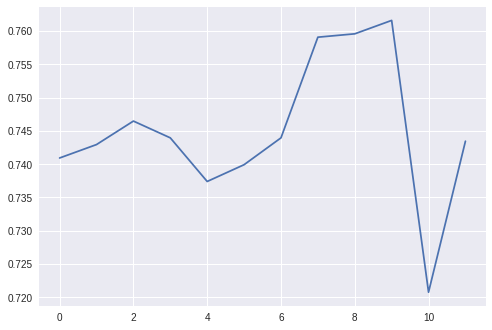

In [0]:
plt.plot(history.history['val_acc'])

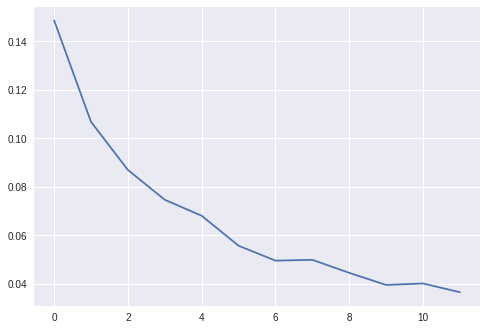

In [0]:
plt.plot(history.history['acc'])#training acc

**♦ Downloading the trained model to test alongside testing script on drive simulator.**

In [0]:
'''from google.colab import files
for i in [2,3,8]: #for downloading multiple models
  files.download('model-00{a}.h5'.format(a=i))'''

model.save('model_12ep_30_6.h5')#saving & downloading above model
!ls
files.download('model_12ep_30_6.h5')

data1.zip  data2.zip  datalab  drive  drive2  model_12ep_30_6.h5


## 11. Model testing
* The trained deep learning model resulting from above is run alongside a **tertiary driving script** which enables the model to interact with simulator enviornment, as it receives a stream of input images from autonomous driving mode of the simulator window, in correspondence to which the model **actively predicts and feeds back** the steering value to simulator backend which manipulates car's driving behaviour in real-time.

* The trained model obtained from above can be tested on driving simultor as follows:


> • Save & download the trained model(ex- model.h5 ) to local machine.

> • Download the drive.py script to same directory as that of model on local machine from [here](https://github.com/leoninekev/applied-ML-MLBLR-/blob/master/Behavioral%20cloning_MLBLR%20project/drive.py).

> • Run the driving simulator on autonomous mode.

> • From command prompt or terminal, navigate the current working to the directory storing drive.py & model file.

> • execute the command - python drive.py model.h5



** ♦ The driving script although provided by udacity needs slight modifcations in accordance with input image size desired by above model i.e., (66, 200, 3). Thus a preprocessing function is added to existing code prior to simulator querring model for generating corresponding steering angles.**


## ♦ Observations:
* Having tried following alteration to above model:


> • Changing kernel sizes from 5x5 to 3x3 in initial 2 layers of network there wasn't much effect on rising training error.
> • Adding a pooling layer after each denseblock did lead to lighter model with less total parameters & training time, but seemed to result driving model with very fluctuating steering angle values.

> • Changing learning rate for all values between 1e-3 to 1e-6 didn't affect falling training accuracy.

> • With lesser or even negligible dropout values training loss decreased over epochs.

Most models yielded insignificant improvements to model performance, as training loss kept rising for each of the above modifcations despite that, above model that is trained for total 15 epochs with defined architecture & above isted training parameters resulted a stable variation in predicted steering angles, and drove the vehicle in simulator quite well.

** * Therefore for most cases the falling training accuracy is suspected cause of insuffiently diverse and meagere amount of training data.**


-----------